In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

In [48]:
train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")

In [49]:
train.head()
#train.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [50]:
#년, 월, 일 추출
    
year=train['datetime'].apply(lambda x : x.split('-')[0])
month=train['datetime'].apply(lambda x : x.split('-')[1])
day=train['datetime'].apply(lambda x : x.split('-')[2][:2])

#train['datetime'].str.split('-')

In [51]:
#형식을 datetime으로 바꿔줘서 날짜 관련된 함수 적용
train.datetime.astype('datetime64').dt.year
train.datetime.astype('datetime64').dt.month
train.datetime.astype('datetime64').dt.day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [44]:
##########날짜 쓸일이 많으면 다 바꿔주자##########
#파일을 불러 올떄 부터 날짜열을 datetime형식으로 바꿔줘서 불러온다
#df=pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
#df
#df.info()
#df['datetime'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [54]:
#문자 타입으로 읽어서 연,월,일 추출하기
train['tempDate']=train.datetime.apply(lambda x : x.split())

In [56]:
train['tempDate']

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [59]:
train['year']=train.tempDate.apply(lambda x : x[0].split('-')[0])
train['month']=train.tempDate.apply(lambda x : x[0].split('-')[1])
train['day']=train.tempDate.apply(lambda x : x[0].split('-')[2])

In [66]:
list(calendar.day_name)   #요일들
list(calendar.day_abbr)   #축약형
calendar.day_name[1]      #요일들 추출 가능

'Tuesday'

In [67]:
import locale

In [107]:
#지역을 우리나라로 설정
#locale.setlocale(locale.LC_ALL,"korean")
#지역변경
#locale.setlocale(locale.LC_ALL,"de_DE")
locale.setlocale(locale.LC_ALL,"english")

'English_United States.1252'

In [108]:
# 요일이 우리나라로 나옴
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [110]:
datetime.today()
datetime

datetime.datetime

In [111]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [112]:
s = pd.Series(pd.date_range("2023-10-20", periods=10, freq="D"))  # day를 기준으로 100일동안에 해당하는 날짜 보여줌
s

0   2023-10-20
1   2023-10-21
2   2023-10-22
3   2023-10-23
4   2023-10-24
5   2023-10-25
6   2023-10-26
7   2023-10-27
8   2023-10-28
9   2023-10-29
dtype: datetime64[ns]

In [113]:
#날짜별 요일정보나옴
s.dt.weekday
s.dt.weekday[0]    #오늘 날짜에 해당하는 요일
list(calendar.day_name)[s.dt.weekday[0]]  #calendar이용해서 리스트에서 오늘에 해당하는 요일 추출

'Friday'

In [84]:
s.dt.year
s.dt.strftime("%Y년 %m월 %d일")  #날짜형식 데이터를 문자열로 변환
#strptime( ) : 문자열 -> 날짜형식
print(datetime.strptime("202310201053","%Y%m%d%H%M"))

"""
%Y : 4자리 수 year
%y : 2자리 수 year
%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다))
"""

2023-10-20 10:53:00


'\n%Y : 4자리 수 year\n%y : 2자리 수 year\n%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)\n%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)\n%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)\n%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)\n%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다))\n'

In [87]:
#날짜 문자 타입을 숫자 타입으로 바꾼다
train
train['year']=pd.to_numeric(train.year)
train['month']=pd.to_numeric(train.month)
train['day']=pd.to_numeric(train.day)

In [121]:
train['hour']=train.tempDate.apply(lambda x : x[1].split(":")[0])

In [127]:
#날짜별 요일을 넣어줌
train['weekday']=train.tempDate.apply(lambda x :calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

In [128]:
#시간 문자형식을 숫자로 바꿔줌
train['hour']=pd.to_numeric(train.hour)

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [132]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"[2012-12-19, 19:00:00]",2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"[2012-12-19, 20:00:00]",2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"[2012-12-19, 21:00:00]",2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"[2012-12-19, 22:00:00]",2012,12,19,22,Wednesday


In [135]:
#tempDate는 이제 필요 없어서 버림
train=train.drop('tempDate',axis=1)

In [155]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [137]:
train.year.value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [147]:
train.groupby('year')['count'].mean().reset_index()  # 연도별 자전거 대여 평균수 

,year,count
0,2011,144.223349
1,2012,238.560944


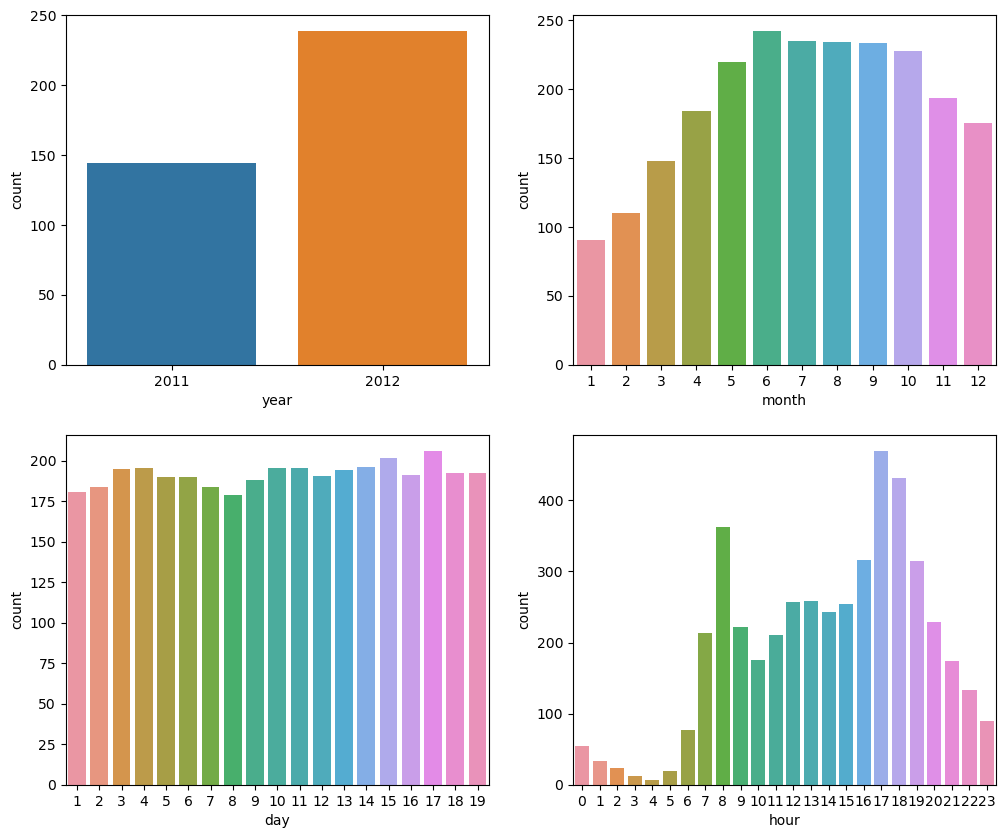

In [152]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(2,2,1)  #2줄 2칸으로 나누고 첫번쨰
ax1=sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())  #연도별 자전거 대여수 평균

ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())  #월별 자전거 대여 평균수

ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())     #일별 평균

ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())    #시간별 평균


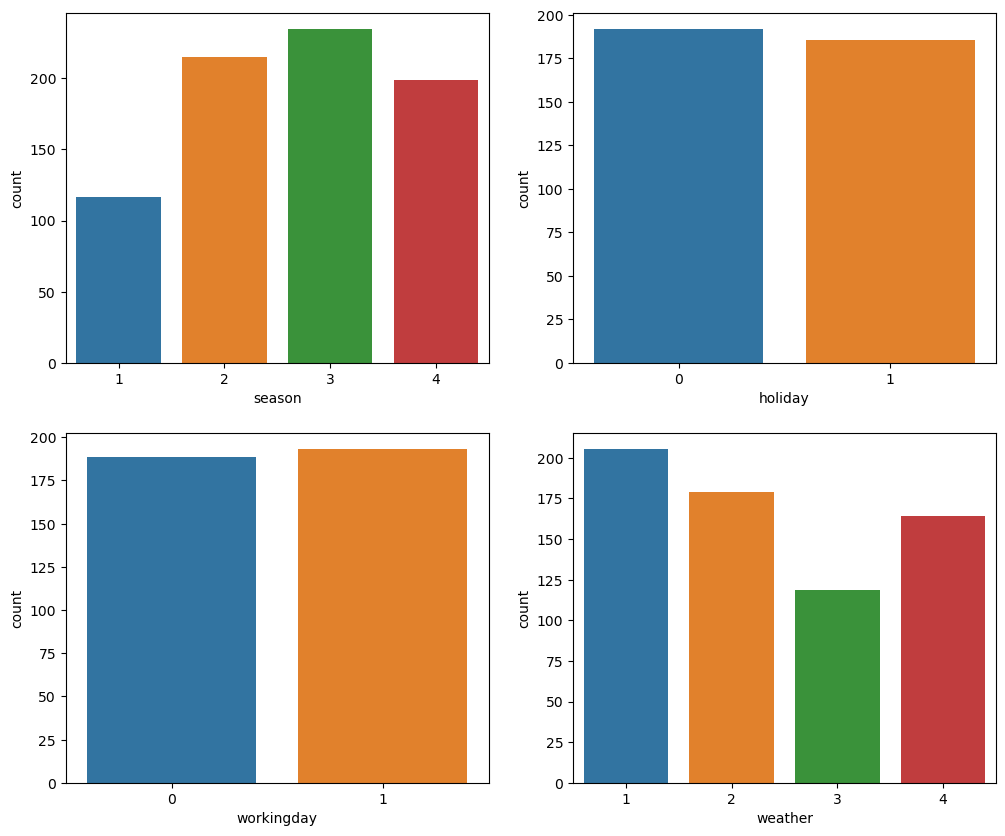

In [156]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(2,2,1)  #2줄 2칸으로 나누고 첫번쨰
ax1=sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())  #연도별 자전거 대여수 평균

ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())  #월별 자전거 대여 평균수

ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())     #일별 평균

ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())    #시간별 평균


In [157]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [161]:
# 원래 데이터의 월 별 계절코드 바꾸기
def newSeason(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2 
    elif month in [9,10,11]:
        return 3

In [162]:
#봄(3,4,5): 1 .. 겨울(12,1,2): 2
train.month
train.season
train['season']=train.month.apply(newSeason)

In [163]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


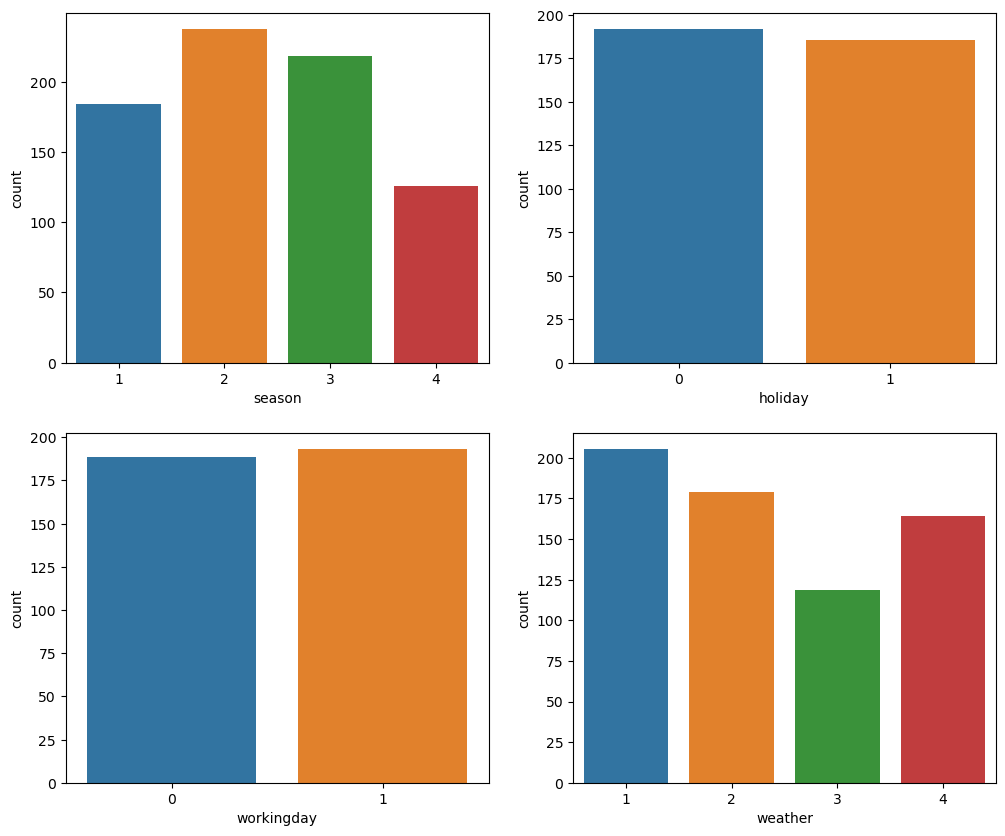

In [164]:
#season 값을 바꿔줌으로 겨울이 가장 낮은것 확인 가능
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(2,2,1)  #2줄 2칸으로 나누고 첫번쨰
ax1=sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())  #연도별 자전거 대여수 평균

ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())  #월별 자전거 대여 평균수

ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())     #일별 평균

ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())    #시간별 평균


C:\Users\user\AppData\Local\Temp\ipykernel_5044\2086291599.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
C:\Users\user\AppData\Local\Temp\ipykernel_5044\2086291599.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.d

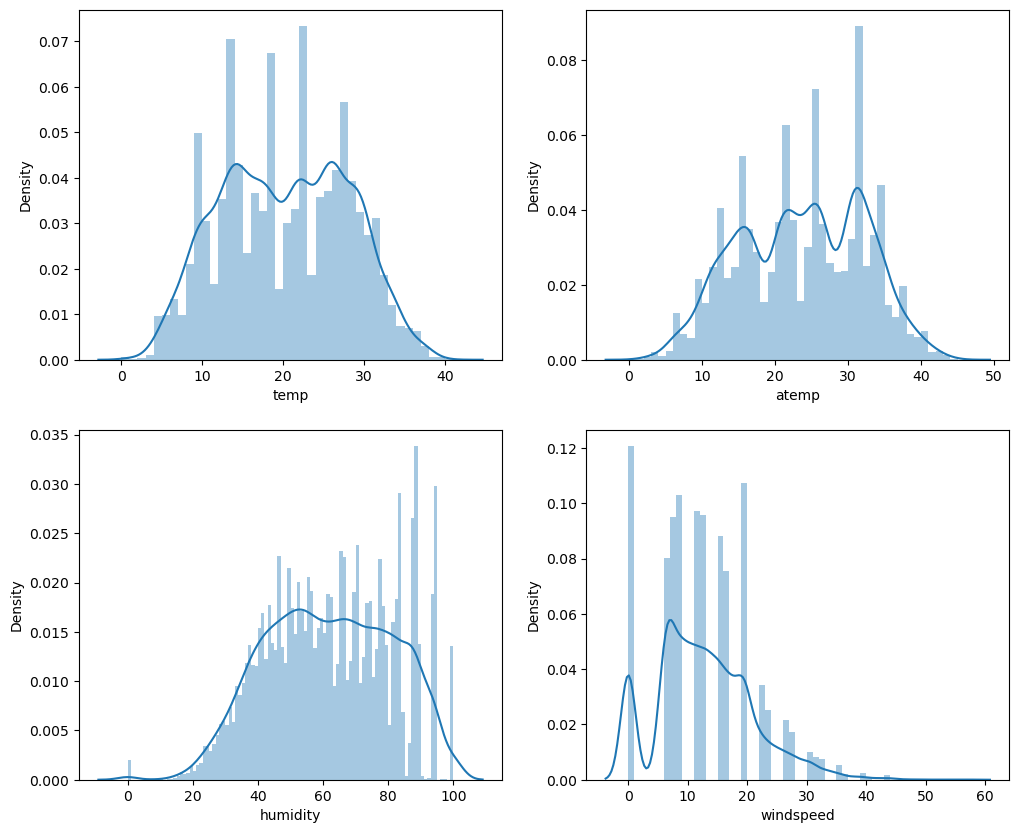

In [168]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(int(train.atemp.min()),int(train.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(int(train.humidity.min()),int(train.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

C:\Users\user\AppData\Local\Temp\ipykernel_5044\2152326737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, square=True)


<Axes: >

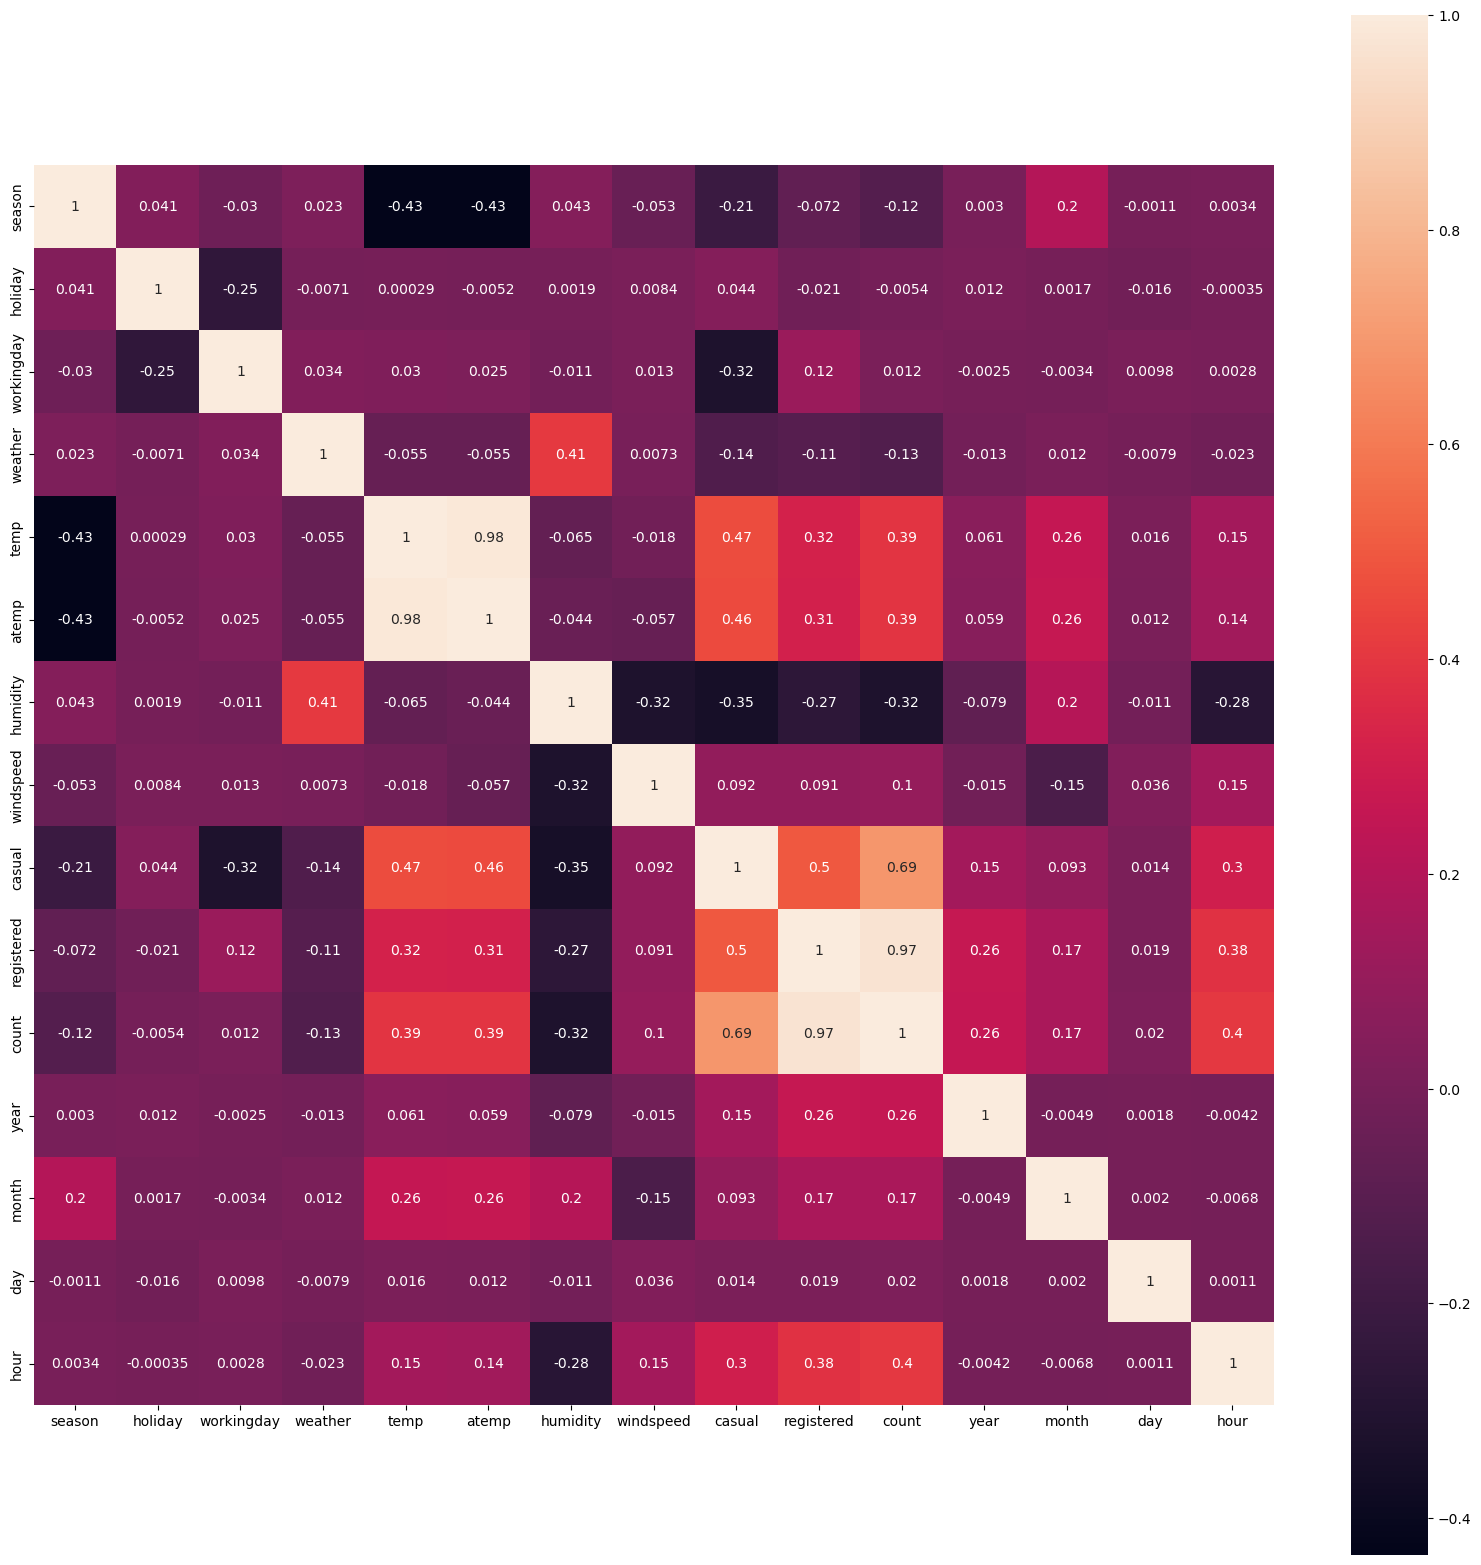

In [170]:
fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

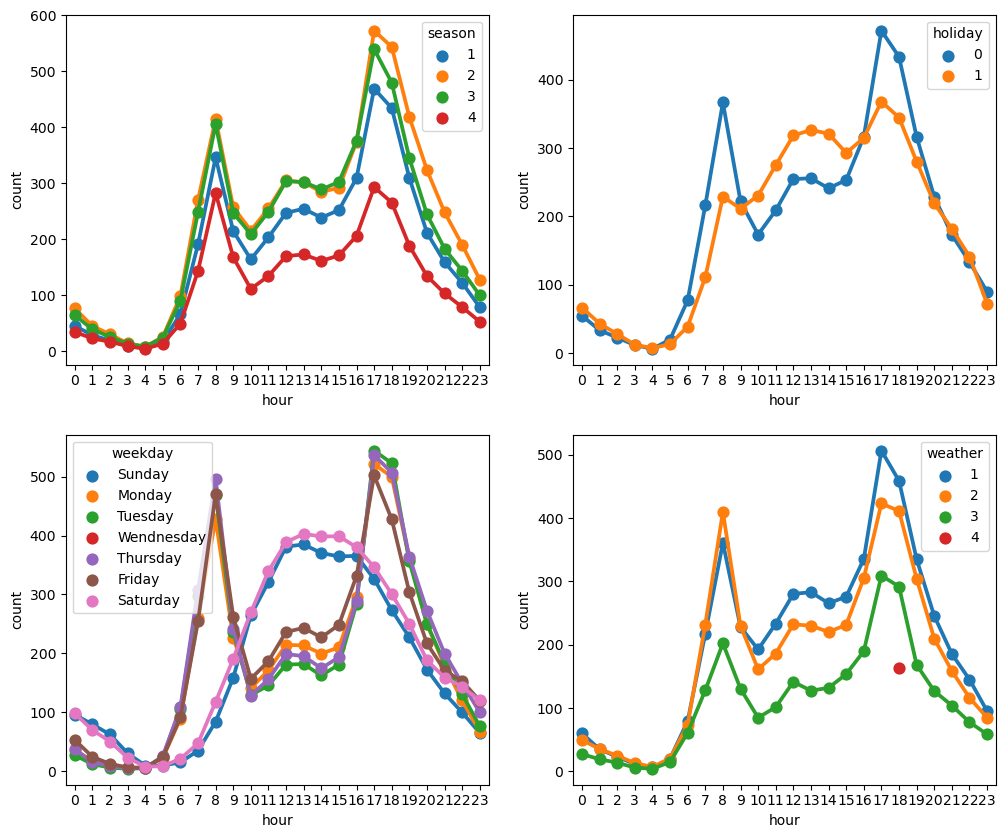

In [171]:
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [173]:
train[train.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


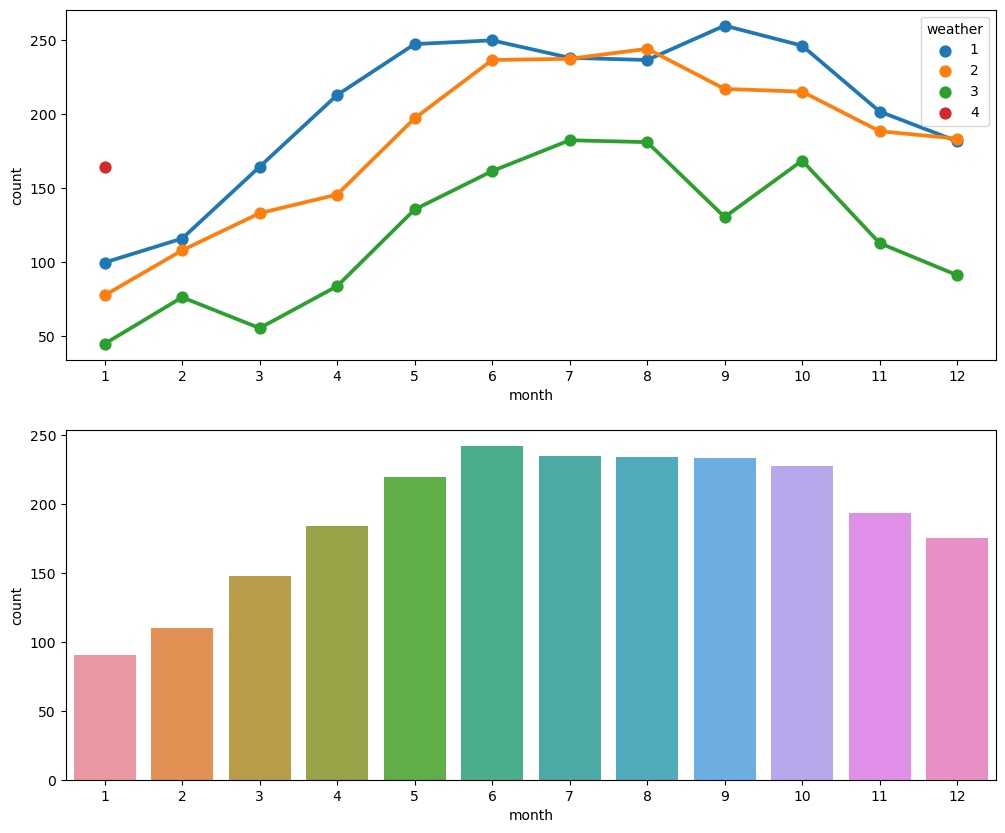

In [174]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())


ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [178]:
#문자타입을 카테고리형으로 바꿔줌
train['weekday']=train.weekday.astype('category')

In [179]:
#카테고리 모두 출력
train['weekday'].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [180]:
#0: sunday~ 6: saturday
train['weekday'].cat.categories=['5','1','6','0','4','2','3']

C:\Users\user\AppData\Local\Temp\ipykernel_5044\3663957090.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  train['weekday'].cat.categories=['5','1','6','0','4','2','3']


In [181]:
train['weekday']

0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: category
Categories (7, object): ['5', '1', '6', '0', '4', '2', '3']

In [183]:
"""
windspeed가 0이 아닌 값들로 구성된 데이터프레임에서 풍속 예측 모델 생성
-> 풍속이 0인 값들로 구성된 데이터프레임에 대한 풍속을 예측하여 값을 저장 
"""
from sklearn.ensemble import RandomForestRegressor  #회귀 문제에 적용되며, 연속적인 숫자 값을 예측하는데 사용됩니다.

In [185]:
#windspeed가 0인것과 아닌 train 추출
windspeed_0=train[train.windspeed==0]
windspeed_not0=train[train.windspeed!=0]

In [187]:
#columns 확인해서 windspeed와 관련없는 열들 드랍한다.
windspeed_0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [189]:
#windspeed와 관련 없는 열들 드랍
windspeed_0_df=windspeed_0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday'], axis=1)

In [190]:
#8차원 입력 데이터
windspeed_0_df

,season,weather,temp,atemp,humidity,year,month,hour
0,4,1,9.84,14.395,81,2011,1,0
1,4,1,9.02,13.635,80,2011,1,1
2,4,1,9.02,13.635,80,2011,1,2
3,4,1,9.84,14.395,75,2011,1,3
4,4,1,9.84,14.395,75,2011,1,4
...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12
10829,4,2,17.22,21.210,88,2012,12,15
10846,4,1,15.58,19.695,94,2012,12,8
10860,4,1,13.94,16.665,49,2012,12,22


In [191]:
windspeed_not0_df=windspeed_not0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday'], axis=1)

In [193]:
#타겟값만 따로 추출
windspeed_not0_series=windspeed_not0['windspeed']

In [192]:
#8차원 입력 데이터
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [ ]:
windspeed_not0_df
windspeed_not0_series

In [194]:
rf=RandomForestRegressor()

In [195]:
rf.fit(windspeed_not0_df,windspeed_not0_series)

RandomForestRegressor()

In [197]:
#fit 한거 가지고 0값들 예측
windspeed_0['windspeed']=rf.predict(windspeed_0_df)

C:\Users\user\AppData\Local\Temp\ipykernel_5044\3784847075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed']=rf.predict(windspeed_0_df)


In [203]:
rf.predict(windspeed_0_df)

array([ 7.622255 ,  7.502325 ,  7.662187 , ...,  8.2566445, 12.00841  ,
        8.011927 ])

In [198]:
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.622255,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.502325,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.662187,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.459358,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.504349,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,14.836739,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,10.648813,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,8.256644,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.008410,5,127,132,2012,12,18,22,2


In [201]:
#windspeed 0이랑 아닌거로 나눠줬던 데이터 프레임 합침
train=pd.concat([windspeed_0,windspeed_not0],axis=0)

In [202]:
train
train[train.windspeed==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday


In [208]:
#날짜형시을 datetime 형식으로 바꿔주기
train.datetime=pd.to_datetime(train.datetime)

In [212]:
#datetime형식을 이용해 오름차순으로 정렬
#train.info()
train=train.sort_values(['datetime'])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.622255,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.502325,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.662187,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.459358,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.504349,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,3


C:\Users\user\AppData\Local\Temp\ipykernel_5044\3615589732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,square=True)


<Axes: >

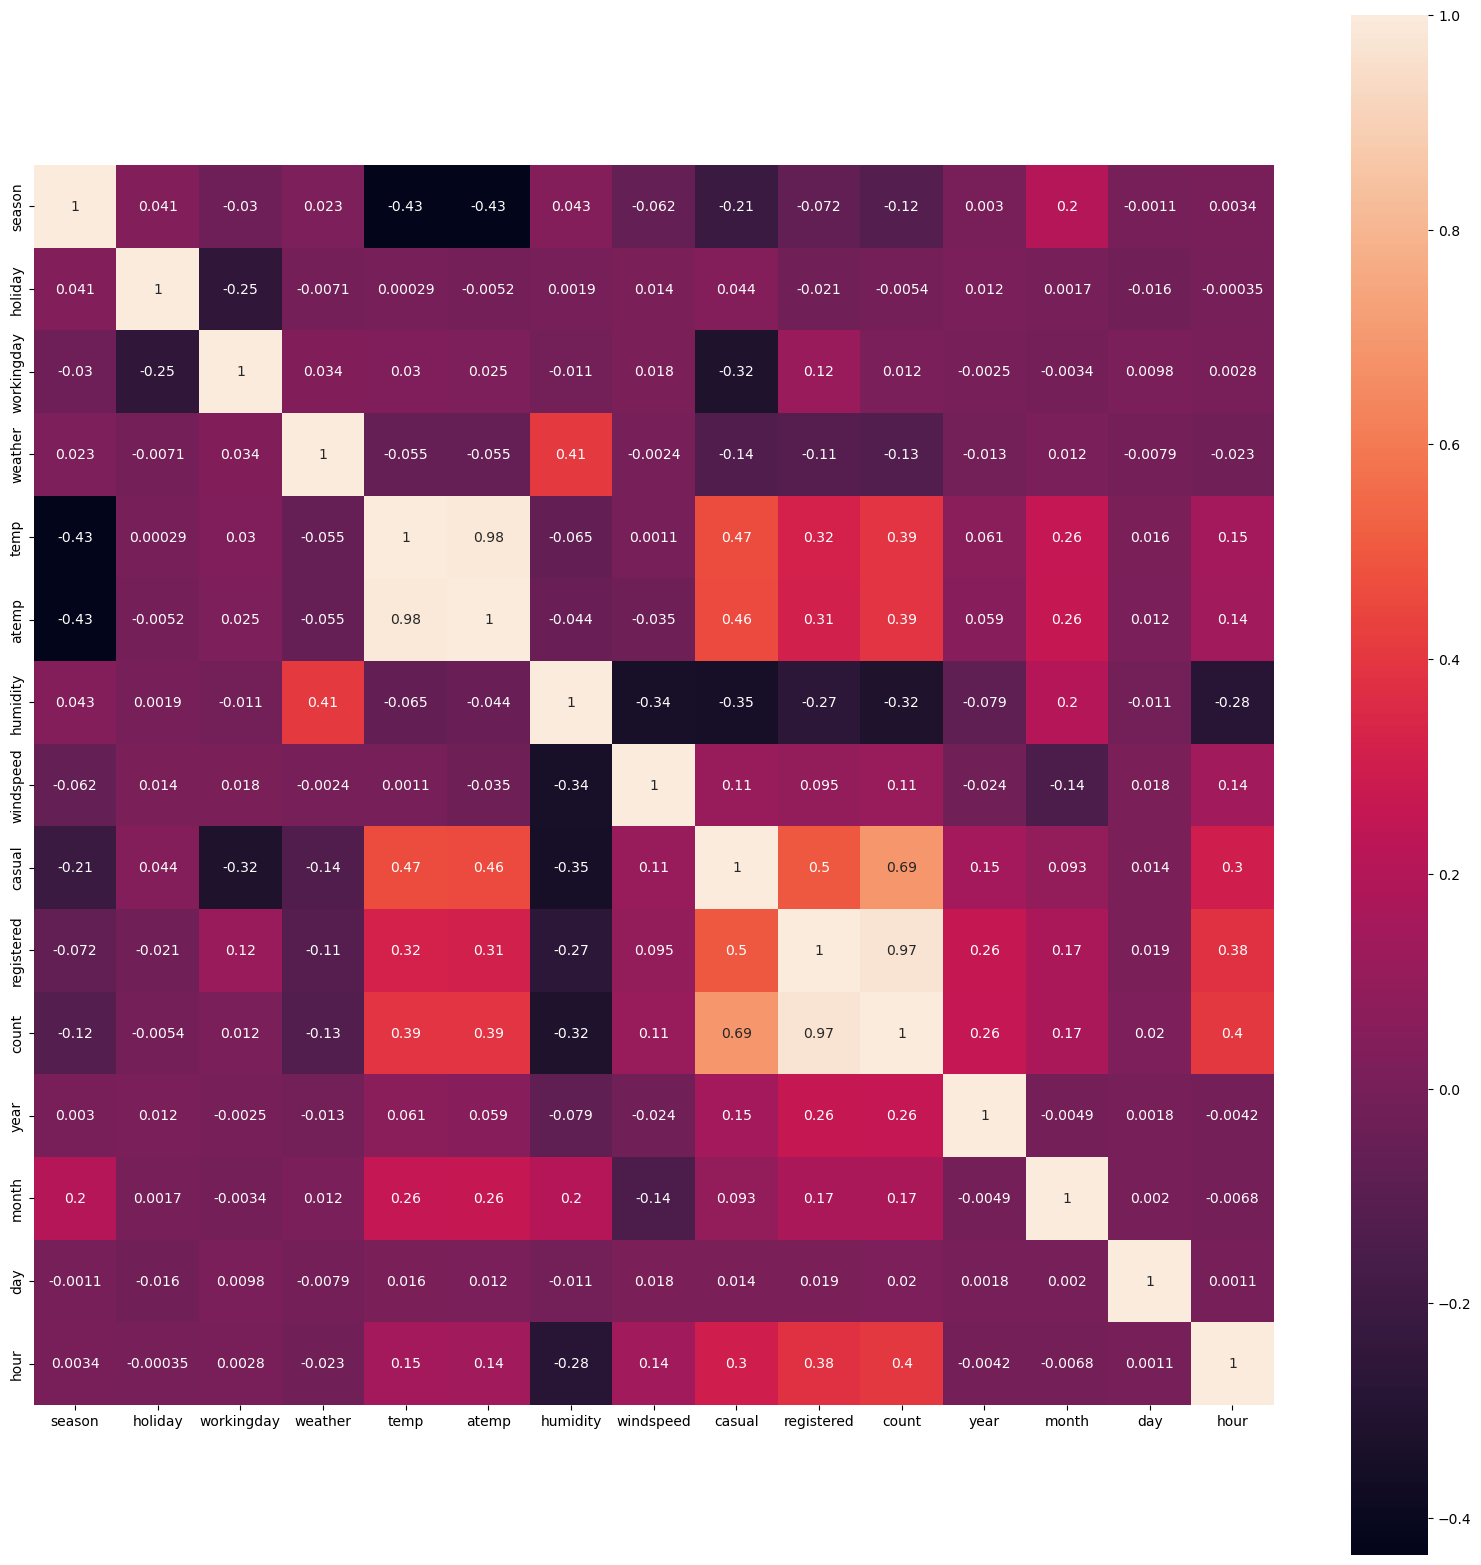

In [213]:
#windspeed 0값을 바꿔주고 count랑 다시한번 상관관계 보기
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5044\2520913288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))


<Axes: xlabel='windspeed', ylabel='Density'>

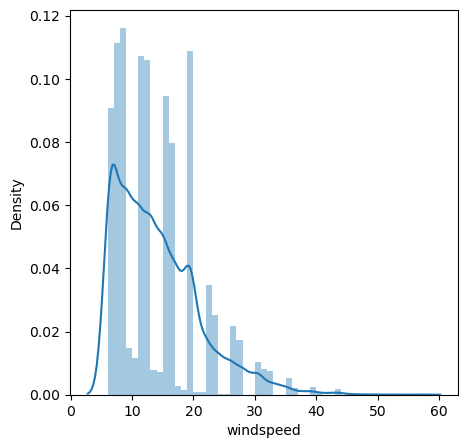

In [214]:
#그래프를 통해 0에 해당하는 windspeed없음 확인 가능 또한 windspeed 커짐에 따라 자전거 대여 경향 줄어듬
plt.figure(figsize=[5,5])
sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [215]:
train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")

In [216]:
combine = pd.concat([train,test],axis=0)

In [217]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [218]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [219]:
combine['year'] = pd.to_numeric(combine.year)
combine['month'] = pd.to_numeric(combine.month)
combine['day'] = pd.to_numeric(combine.day)
combine['hour'] = pd.to_numeric(combine.hour)

In [220]:
combine['season']=combine.month.apply(newSeason)

In [221]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [222]:
combine.weekday = combine.weekday.astype('category')

In [223]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

C:\Users\user\AppData\Local\Temp\ipykernel_5044\3864947247.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  combine.weekday.cat.categories = ['5','1','6','0','4','2','3']


In [224]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [225]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [227]:
dataWind0_df=dataWind0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday','tempDate'], axis=1)
dataWindNot0_df=dataWindNot0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday','tempDate'], axis=1)

In [228]:
dataWindNot0_series=dataWindNot0['windspeed']

In [229]:
dataWindNot0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
6488,4,2,10.66,12.880,60,2012,12,19
6489,4,2,10.66,12.880,60,2012,12,20
6490,4,1,10.66,12.880,60,2012,12,21
6491,4,1,10.66,13.635,56,2012,12,22


In [230]:
rf2=RandomForestRegressor()

In [232]:
rf2.fit(dataWindNot0_df,dataWindNot0_series)

RandomForestRegressor()

In [235]:
pred=rf2.predict(dataWind0_df)
pred

array([ 6.6676055,  6.4678115,  6.4678115, ...,  7.651735 , 23.860241 ,
        7.881076 ])

In [237]:
dataWind0['windspeed']=pred

C:\Users\user\AppData\Local\Temp\ipykernel_5044\2633739318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0['windspeed']=pred


In [238]:
dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,6.667605,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",6,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.467811,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",6,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.467811,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",6,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.510306,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",6,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.190448,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",6,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,7.832367,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.102377,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,7.651735,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,23.860241,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [300]:
combine=pd.concat([dataWindNot0,dataWind0],axis=0)
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.003200,0.0,1.0,1.0,"[2011-01-01, 05:00:00]",6,2011,1,1,5
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.997900,12.0,24.0,36.0,"[2011-01-01, 10:00:00]",6,2011,1,1,10
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.001200,26.0,30.0,56.0,"[2011-01-01, 11:00:00]",6,2011,1,1,11
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.001200,29.0,55.0,84.0,"[2011-01-01, 12:00:00]",6,2011,1,1,12
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.999500,47.0,47.0,94.0,"[2011-01-01, 13:00:00]",6,2011,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,7.832367,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.102377,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,7.651735,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,23.860241,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [301]:
combine.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [302]:
cate_cols=['season','weather','weekday','year', 'month','hour']
drop_cols=['datetime','casual','registered','count','tempDate','day']

In [303]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.003200,0.0,1.0,1.0,"[2011-01-01, 05:00:00]",6,2011,1,1,5
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.997900,12.0,24.0,36.0,"[2011-01-01, 10:00:00]",6,2011,1,1,10
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.001200,26.0,30.0,56.0,"[2011-01-01, 11:00:00]",6,2011,1,1,11
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.001200,29.0,55.0,84.0,"[2011-01-01, 12:00:00]",6,2011,1,1,12
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.999500,47.0,47.0,94.0,"[2011-01-01, 13:00:00]",6,2011,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,7.832367,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.102377,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,7.651735,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,23.860241,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [304]:
for col in cate_cols:
    combine[col]=combine[col].astype('category')

In [305]:
#count가 결측인것만 뽑아서 test에 담음
test=combine[~pd.notnull(combine['count'])].sort_values("datetime")
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,"[2011-01-20, 00:00:00]",4,2011,1,20,0
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,9.718953,NaN,NaN,NaN,"[2011-01-20, 01:00:00]",4,2011,1,20,1
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,9.249417,NaN,NaN,NaN,"[2011-01-20, 02:00:00]",4,2011,1,20,2
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 03:00:00]",4,2011,1,20,3
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 04:00:00]",4,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 19:00:00]",1,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 20:00:00]",1,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 21:00:00]",1,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,"[2012-12-31, 22:00:00]",1,2012,12,31,22


In [306]:
combine['month']
#count가 결측 아닌것들만 뽑아 train
train=combine[pd.notnull(combine['count'])].sort_values("datetime")
train

ylabel=train['count']
datetimecol=test['datetime']

In [307]:
drop_cols
train=train.drop(drop_cols,axis=1)
test=test.drop(drop_cols,axis=1)

In [308]:
train.head() #12개 열
test.head()  #12개 열

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,hour
0,4,0,1,1,10.66,11.365,56,26.002700,4,2011,1,0
1,4,0,1,1,10.66,13.635,56,9.718953,4,2011,1,1
2,4,0,1,1,10.66,13.635,56,9.249417,4,2011,1,2
3,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,3
4,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,4


In [309]:
train
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,hour
0,4,0,1,1,10.66,11.365,56,26.002700,4,2011,1,0
1,4,0,1,1,10.66,13.635,56,9.718953,4,2011,1,1
2,4,0,1,1,10.66,13.635,56,9.249417,4,2011,1,2
3,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,3
4,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,4,0,1,2,10.66,12.880,60,11.001400,1,2012,12,19
6489,4,0,1,2,10.66,12.880,60,11.001400,1,2012,12,20
6490,4,0,1,1,10.66,12.880,60,11.001400,1,2012,12,21
6491,4,0,1,1,10.66,13.635,56,8.998100,1,2012,12,22


In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [311]:
# Regressor은 n개의 딕션트리에서 예측값들이 나오고 평균을 내준다
rf=RandomForestRegressor()
rf_params={'n_estimators':[10,30,50,70,100,200]}

In [312]:
grid_cf=GridSearchCV(rf,rf_params,scoring='neg_mean_squared_error', cv= 5)

In [313]:
grid_cf.fit(train, ylabel)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 30, 50, 70, 100, 200]},
             scoring='neg_mean_squared_error')

In [296]:
grid_cf.predict(test)

array([ 10.75714286,   5.05714286,   3.58571429, ..., 167.72857143,
       117.3       ,  67.32857143])

In [297]:
grid_cf.predict(train)

array([ 22.41428571,  34.48571429,  27.95714286, ..., 178.08571429,
       143.77142857,  96.32857143])

In [315]:
mysubmission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
mysubmission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [316]:
mysubmission['count']=grid_cf.predict(test)

In [318]:
mysubmission.to_csv('mysubmission.csv',index=False)

In [ ]:
#### 참고만 ###

In [320]:
# from sklearn.ensemble import GradientBoostingRegressor

In [326]:
# gb=GradientBoostingRegressor()

In [331]:
# gb_params={'max_depth':range(3,21,2),'n_estimators':[10,50,100,500]}
# grid_gb=GridSearchCV(gb,gb_params,scoring='neg_mean_squared_log_error',cv=5)
# grid_gb.fit(train,ylabel)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(3, 21, 2),
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_log_error')

In [332]:
# preds = grid_gb.predict(test)

In [333]:
# mysubmission['count']=preds
# mysubmission.to_csv("mysubmission_grdientboosting.csv", index=False)

In [242]:
combine['season'].astype('category')  #category타입은 종류에 해당하는것

5       4
10      4
11      4
12      4
13      4
       ..
6433    4
6434    4
6436    4
6444    4
6464    4
Name: season, Length: 17379, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [243]:
#원 핫 인코딩, 데이터를 범주형(종류)으로 표현하기 위함 -> ex) 1+2=3 처럼 봄 + 여름이 가을이 되면 안되니깐
pd.get_dummies(combine['season'])

,1,2,3,4
5,0,0,0,1
10,0,0,0,1
11,0,0,0,1
12,0,0,0,1
13,0,0,0,1
...,...,...,...,...
6433,0,0,0,1
6434,0,0,0,1
6436,0,0,0,1
6444,0,0,0,1


In [246]:
"""
데이터 타입 : 수치형, 범주형 
수치형 : 연속형(실수), 이산형(정수,1,2,3....) 
범주형(여러개로 나눠지는거: 종류) : 명목형(순서가 없음, 혈액형, 색깔 등), 순서형(1월~12월)
"""

''